# HIV Reverse Transcriptase ligands for pharmacophore identification

We explore reverse transcriptase ligands that will be used to create ligand-based pharmacophore models.

In [1]:
import openpharmacophore as oph

import pandas as pd
import nglview as nv
from rdkit import Chem
from rdkit.Chem import Draw

import os
from pprint import pprint
from IPython.display import SVG

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

In [2]:
lig_df = pd.read_csv("ligands.csv")
lig_df

,Smiles,PDBID,LigID
0,CC(C)Nc1cccnc1N2CCN(CC2)C(=O)c3cc4cc(ccc4[nH]3...,1KLM,SPP
1,c1cc2c(cc1Cl)[C@@](OC(=O)N2)(C#CC3CC3)C(F)(F)F,1FK9,EFZ
2,Cc1ccc(c(c1)N[C@@H](c2c(cccc2Cl)Cl)C(=O)N)C(=O)C,1VRU,AAP
3,Cc1c(cco1)C(=S)Nc2ccc(c(c2)\C=N\OC(C)(C)C)Cl,1RT5,UC2
4,CCN1c2cc(ccc2N(C(=O)c3c1nccc3)C)[N+](=O)[O-],1RT3,U05
5,CCOCN1C(=C(C(=O)NC1=O)C(C)C)Cc2ccccc2,1RT1,MKC
6,CCOc1ccnc(c1F)CCNC(=S)Nc2ccc(cn2)Cl,1DTT,FTC
7,C[C@H]1CN2c3c(cc(cc3NC2=S)Cl)CN1CC=C(C)C,1TVR,TB9
8,CC(C)c1c(n(c(n1)COC(=O)N)Cc2ccncc2)Sc3cc(cc(c3...,1EP4,S11
9,CC(C)OC(=O)N1c2cc(ccc2NC(=S)[C@@H]1CSC)OC,1BQM,HBY


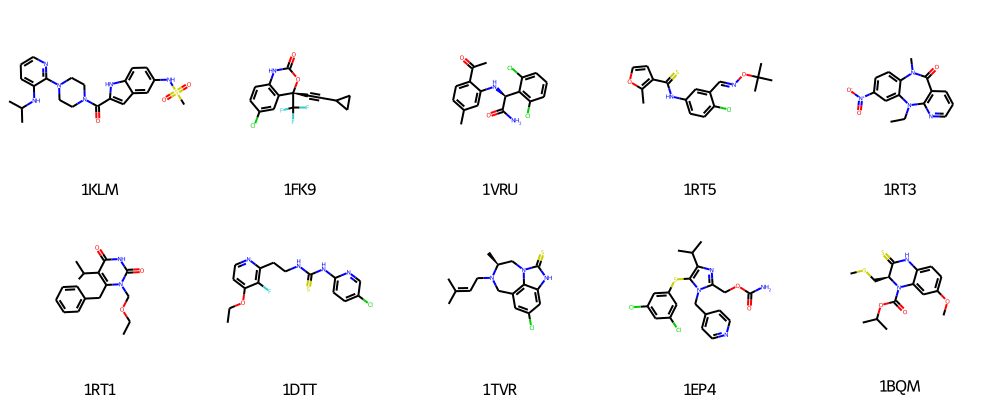

In [3]:
ligands = [Chem.MolFromSmiles(smi) for smi in lig_df["Smiles"]]
legends = [l for l in lig_df["PDBID"]]
Draw.MolsToGridImage(ligands, legends=legends, molsPerRow=5)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

In [4]:
# Add hydrogens
pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

In [5]:
pharmacophore.generate_conformers(n_confs=-1, ligands="all")
print([l.GetNumConformers() for l in pharmacophore.ligands])

[143, 3, 12, 21, 4, 31, 43, 26, 60, 28]


## View 3D structures

In [6]:
lig_ind = 2
conf_ind = 2
nv.show_rdkit(pharmacophore.ligands[lig_ind], conf_ind=conf_ind)

NGLWidget()

## Chemical features

We find chemical features in the ligands and visualize them.

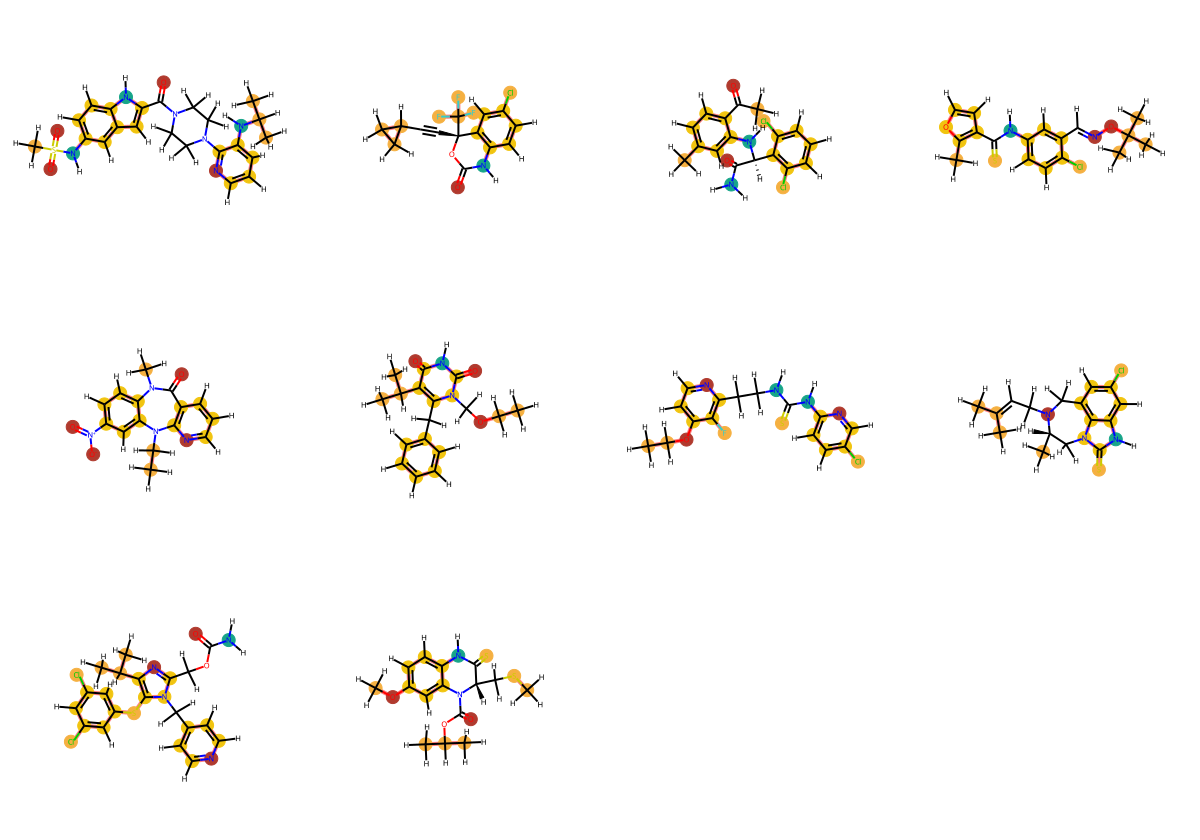

In [8]:
pharmacophore.find_chem_feats()
drawing = pharmacophore.draw((300, 280))
SVG(drawing.GetDrawingText())

## Extracting common pharmacophores

We extract common pharmacophores via recursive distance partitioning algorithm

### Finding 5-Point Pharmacophores

In [11]:
min_actives = len(pharmacophore.ligands) - 3
n_points = 5

pharmacophore.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)
print(f"Found {len(pharmacophore)} common pharmacophores")

Found 0 common pharmacophores


### Finding 4-Point Pharmacophores

In [16]:
min_actives = len(pharmacophore.ligands) - 4
n_points = 4

pharma_4 = oph.LigandBasedPharmacophore()
pharma_4.ligands = pharmacophore.ligands
pharma_4.find_chem_feats()
pharma_4.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)

print(f"Found {len(pharma_4)} common pharmacophores")

Found 2 common pharmacophores


In [17]:
pharma_4.show()

NGLWidget()

### Finding 3-Point Pharmacophores

In [19]:
min_actives = len(pharmacophore.ligands) - 1
n_points = 3

pharma_3 = oph.LigandBasedPharmacophore()
pharma_3.ligands = pharmacophore.ligands
pharma_3.find_chem_feats()
pharma_3.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)

print(f"Found {len(pharma_3)} common pharmacophores")

Found 8 common pharmacophores


In [20]:
pharma_3.show()

NGLWidget()